In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('Data/Fake_Real_News_Data.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [3]:
df= df.drop(columns= 'Unnamed: 0')
df.head()

,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [4]:
df.duplicated().sum()

29

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

***Prepare the Data***

In [6]:
df['Tokenized'] = df['text'].apply(lambda x: x.split())
df.head()

,title,text,label,Tokenized
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[Donald, Trump, endorsed, an, unabashedly, non..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[While, some, Justice, Department, investigati..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[Trump, Proudly, Declares:, Most, Of, The, Peo..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[Donald, Trump, spent, a, day, in, January, 20..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[Notable, names, include, Ray, Washburne, (Com..."


In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [9]:
def lemmatize(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return lemmatized_text

df['Lemmatized'] = df['text'].apply(lemmatize)
df.head()

,title,text,label,Tokenized,Lemmatized
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[Donald, Trump, endorsed, an, unabashedly, non...","[Donald, Trump, endorse, unabashedly, noninter..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[While, some, Justice, Department, investigati...","[Justice, Department, investigation, adversari..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[Trump, Proudly, Declares:, Most, Of, The, Peo...","[Trump, Proudly, declare, People, insult, Dese..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[Donald, Trump, spent, a, day, in, January, 20...","[Donald, Trump, spend, day, January, 2014, hob..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[Notable, names, include, Ray, Washburne, (Com...","[notable, name, include, Ray, Washburne, Comme..."


In [10]:
def join_lemmatized_text(tokens):
    return ' '.join(tokens)

In [11]:
df['Joined'] = df['Lemmatized'].apply(join_lemmatized_text)
df.head()

,title,text,label,Tokenized,Lemmatized,Joined
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[Donald, Trump, endorsed, an, unabashedly, non...","[Donald, Trump, endorse, unabashedly, noninter...",Donald Trump endorse unabashedly noninterventi...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[While, some, Justice, Department, investigati...","[Justice, Department, investigation, adversari...",Justice Department investigation adversarial n...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[Trump, Proudly, Declares:, Most, Of, The, Peo...","[Trump, Proudly, declare, People, insult, Dese...",Trump Proudly declare People insult Deserved A...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[Donald, Trump, spent, a, day, in, January, 20...","[Donald, Trump, spend, day, January, 2014, hob...",Donald Trump spend day January 2014 hobnob pol...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[Notable, names, include, Ray, Washburne, (Com...","[notable, name, include, Ray, Washburne, Comme...",notable name include Ray Washburne Commerce Da...


***Analyze Class Balance***

In [12]:
# Class balance
class_balance = df['label'].value_counts()
num_real_articles = class_balance['REAL']
num_fake_articles = class_balance['FAKE']

print("Class Balance:")
print("Number of Real Articles:", num_real_articles)
print("Number of Fake Articles:", num_fake_articles)

Class Balance:
Number of Real Articles: 3154
Number of Fake Articles: 3152


In [13]:
# Average word count
df['Word_Count'] = df['Tokenized'].apply(len)
average_word_count_real = df[df['label'] == 'REAL']['Word_Count'].mean()
average_word_count_fake = df[df['label'] == 'FAKE']['Word_Count'].mean()

print("\nAverage Word Count:")
print("Real News Articles:", average_word_count_real)
print("Fake News Articles:", average_word_count_fake)


Average Word Count:
Real News Articles: 873.7035510462904
Fake News Articles: 678.933692893401


In [16]:
freq_dist = df.groupby('label')['tokens'].apply(lambda x: FreqDist(word for sublist in x for word in sublist))

***Compare Word Frequencies***

In [17]:
# Create filters for 1 and 5 star reviews
filter_real = df['label'] == 'REAL'
filter_fake = df['label'] == 'FAKE'
filter_real.sum(), filter_fake.sum()

(3154, 3152)

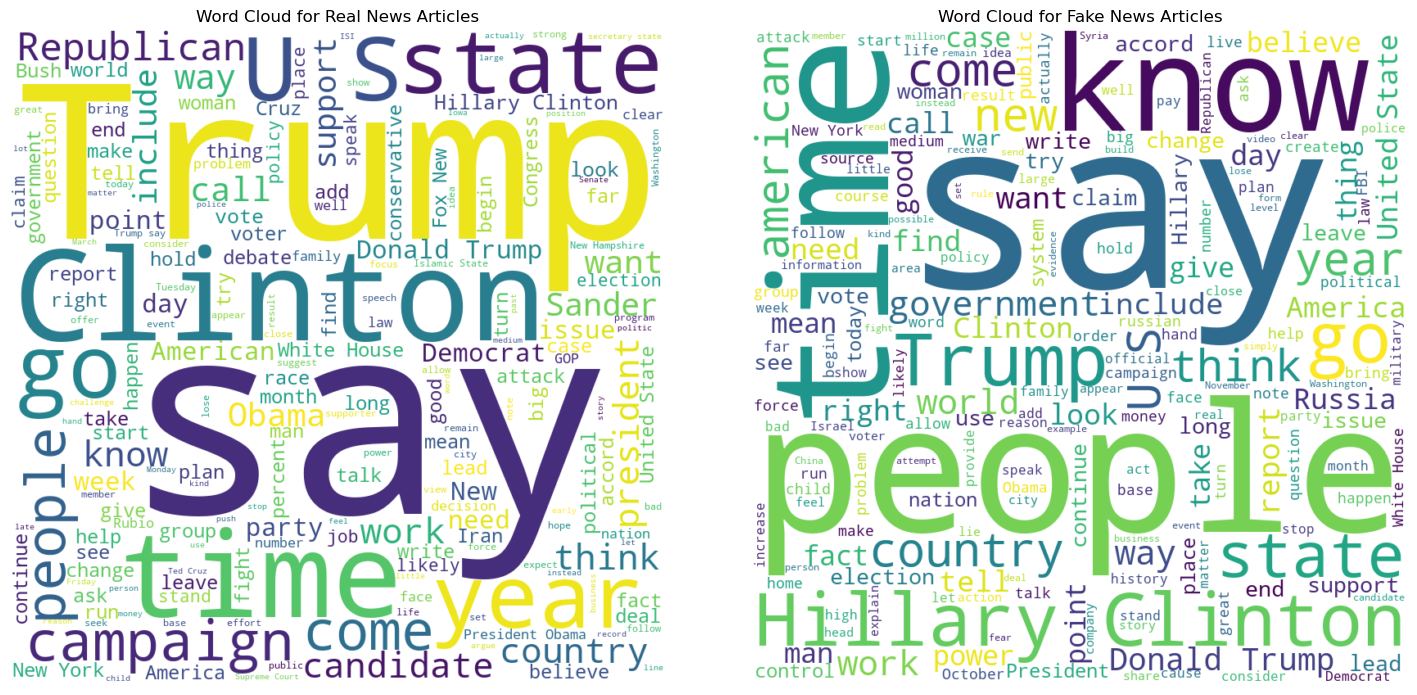

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create filters for real and fake news articles
filter_real = df['label'] == 'REAL'
filter_fake = df['label'] == 'FAKE'

# Create word clouds for real and fake news articles
real_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df[filter_real]['Joined']))
fake_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df[filter_fake]['Joined']))

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(real_cloud, interpolation='bilinear')
axes[0].set_title('Word Cloud for Real News Articles')
axes[0].axis('off')

axes[1].imshow(fake_cloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for Fake News Articles')
axes[1].axis('off')

plt.tight_layout()
plt.show()